In [2]:
import sys
sys.path.append('../script/')

In [3]:
import librosa
import constants

_raw = librosa.load(
    "../dataset/raw/Banten/JWB-20090117.wav",
    sr=constants.SAMPLE_RATE,
    mono=True
)[0]

In [4]:
_raw

array([0.        , 0.        , 0.        , ..., 0.07184704, 0.08652782,
       0.        ], dtype=float32)

In [5]:
_mel_spectrogram = librosa.feature.melspectrogram(_raw, sr=constants.SAMPLE_RATE, n_fft=constants.FFT_NUMBER, fmin=200, fmax=4000)
_mel_spectrogram.shape

(128, 21729)

In [6]:
import extract_features as ef

_mel_spectrogram_desilenced = ef.trim_silence(_raw, _mel_spectrogram)
_mel_spectrogram_desilenced.shape

(128, 20903)

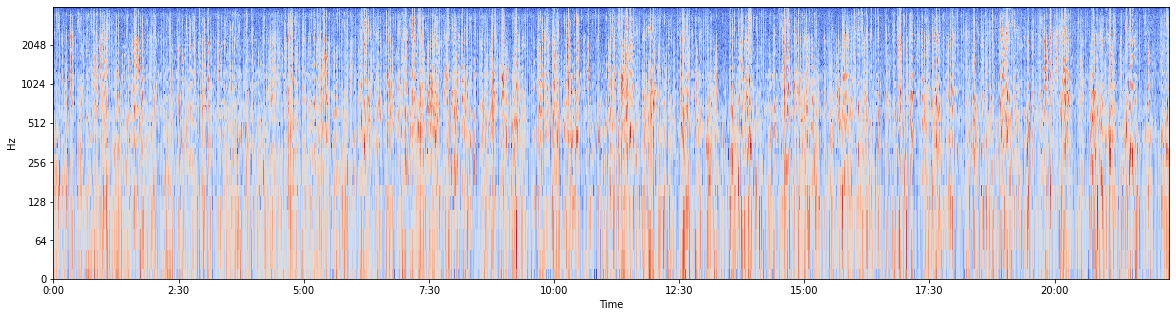

In [7]:
from librosa import display
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(20, 5))
display.specshow(librosa.core.power_to_db(_mel_spectrogram_desilenced), sr=constants.SAMPLE_RATE, x_axis='time', y_axis='log')

plt.show()

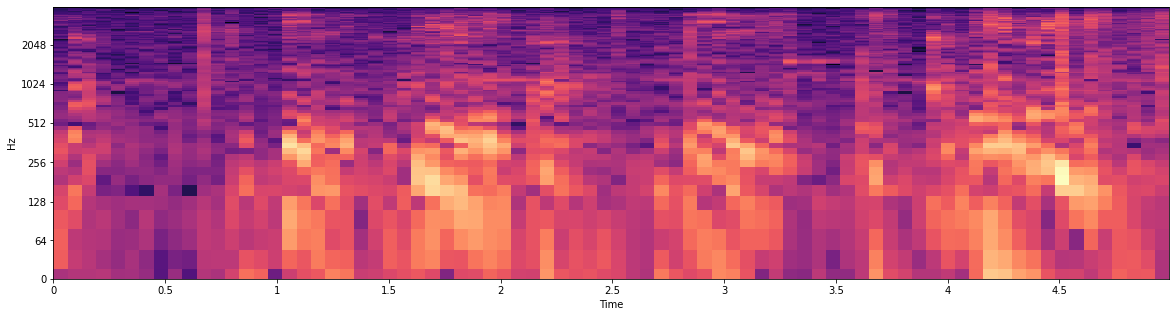

In [8]:
# Window
plt.figure(figsize=(20, 5))
display.specshow(librosa.core.power_to_db(_mel_spectrogram_desilenced[:, :constants.WINDOW_SIZE]), sr=constants.SAMPLE_RATE, x_axis='time', y_axis='log')

plt.show()

In [9]:
_mel_spectrogram_desilenced.shape

(128, 20903)

In [72]:
import numpy as np

def split_window(feature, window_size=constants.WINDOW_SIZE):
    windows = list()
    l_p = 0
    r_p = window_size
    while l_p < feature.shape[1]:
        temp = feature[:, l_p:r_p]
        print(temp.shape, l_p, r_p, constants.WINDOW_SIZE - temp.shape[1])
        if temp.shape[1] != window_size:
            print(temp.shape[1], window_size)
            while temp.shape[1] < window_size:
                print('pass')
                temp = np.append(temp, [[0]] * 128, axis=1)

        windows.append(temp)
        l_p += window_size
        r_p += window_size
    print('end')
    return np.array(windows, dtype=float)

In [73]:
_windows = split_window(_mel_spectrogram_desilenced)
_windows.shape
_windows.dtype

(128, 78) 0 78 0
(128, 78) 78 156 0
(128, 78) 156 234 0
(128, 78) 234 312 0
(128, 78) 312 390 0
(128, 78) 390 468 0
(128, 78) 468 546 0
(128, 78) 546 624 0
(128, 78) 624 702 0
(128, 78) 702 780 0
(128, 78) 780 858 0
(128, 78) 858 936 0
(128, 78) 936 1014 0
(128, 78) 1014 1092 0
(128, 78) 1092 1170 0
(128, 78) 1170 1248 0
(128, 78) 1248 1326 0
(128, 78) 1326 1404 0
(128, 78) 1404 1482 0
(128, 78) 1482 1560 0
(128, 78) 1560 1638 0
(128, 78) 1638 1716 0
(128, 78) 1716 1794 0
(128, 78) 1794 1872 0
(128, 78) 1872 1950 0
(128, 78) 1950 2028 0
(128, 78) 2028 2106 0
(128, 78) 2106 2184 0
(128, 78) 2184 2262 0
(128, 78) 2262 2340 0
(128, 78) 2340 2418 0
(128, 78) 2418 2496 0
(128, 78) 2496 2574 0
(128, 78) 2574 2652 0
(128, 78) 2652 2730 0
(128, 78) 2730 2808 0
(128, 78) 2808 2886 0
(128, 78) 2886 2964 0
(128, 78) 2964 3042 0
(128, 78) 3042 3120 0
(128, 78) 3120 3198 0
(128, 78) 3198 3276 0
(128, 78) 3276 3354 0
(128, 78) 3354 3432 0
(128, 78) 3432 3510 0
(128, 78) 3510 3588 0
(128, 78) 3588 36

dtype('float64')

In [76]:
print(_windows[-1])

[[5.64531088e-02 2.14916933e-03 1.18150292e-02 ... 1.51997301e-04
  4.44651358e-02 0.00000000e+00]
 [2.99569331e-02 6.30473311e-04 2.97931246e-02 ... 1.51772040e-03
  3.53777967e-02 0.00000000e+00]
 [2.01071668e-02 2.89757526e-03 2.27449182e-02 ... 1.59244565e-03
  3.89457978e-02 0.00000000e+00]
 ...
 [1.09117991e-05 1.53569249e-06 1.27111125e-05 ... 4.31894114e-06
  6.09537761e-04 0.00000000e+00]
 [9.83384666e-07 1.33682875e-06 1.45487979e-06 ... 1.58431658e-06
  5.67148440e-04 0.00000000e+00]
 [4.23746371e-08 1.31595321e-08 2.38655105e-08 ... 1.59859326e-07
  5.02308074e-04 0.00000000e+00]]


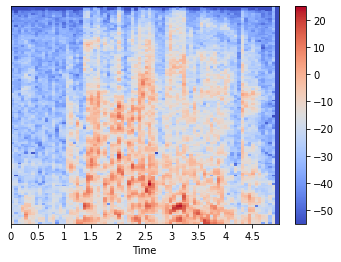

In [79]:
librosa.display.specshow(librosa.power_to_db(_windows[-1]), sr=constants.SAMPLE_RATE, x_axis='time')


plt.colorbar()
plt.show()